In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
path="/Users/meijiaojiao/Desktop/Evolution_algorithm/Final/Lamarck/Lamarck_percent.csv"
lamarck = pd.read_csv(path,header=0,index_col=[0])
print(lamarck.shape)
print(lamarck.shape)

path="/Users/meijiaojiao/Desktop/Evolution_algorithm/Final/SSGA/SSGA_percent.csv"
SSGA = pd.read_csv(path,header=0,index_col=[0])
print(SSGA.shape)

path="/Users/meijiaojiao/Desktop/Evolution_algorithm/Final/Baldwin/Baldwin_percent.csv"
baldwin = pd.read_csv(path,header=0,index_col=[0])
print(baldwin.shape)

df_together = pd.concat([lamarck,SSGA,baldwin],axis=0,keys=["Lamarck","SSGA","Baldwin"])
print(df_together.shape)
df_together = df_together.applymap(lambda x:x if not '%' in str(x) else x.replace('%',''))
print(df_together.dtypes)

(23, 20)
(23, 20)
(23, 20)
(23, 20)
(69, 20)
590    object
593    object
579    object
588    object
589    object
591    object
576    object
587    object
569    object
558    object
592    object
572    object
594    object
542    object
570    object
562    object
575    object
573    object
552    object
555    object
dtype: object


         Function     
Lamarck  F1        590    100
                   593    100
                   579    100
                   588    100
                   589    100
                         ... 
Baldwin  F23       562     90
                   575    100
                   573     70
                   552     80
                   555     80
Length: 1380, dtype: object

,Function,Mode,Combinations,Percent
0,F1,Lamarck,590,100
1,F1,Lamarck,593,100
2,F1,Lamarck,579,100
3,F1,Lamarck,588,100
4,F1,Lamarck,589,100
...,...,...,...,...
1375,F23,Baldwin,562,90
1376,F23,Baldwin,575,100
1377,F23,Baldwin,573,70
1378,F23,Baldwin,552,80


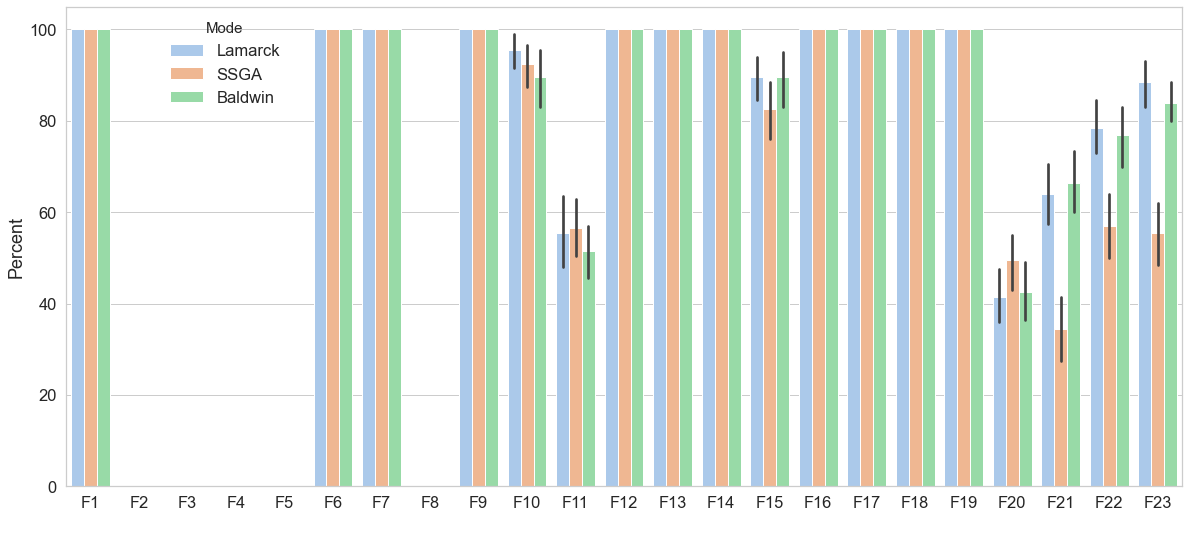

In [15]:
import seaborn as sns
dataframe = df_together
dataframe = dataframe.stack()
display(dataframe)
dataframe = dataframe.rename_axis(index=["Mode","Function","Combinations"])
dataframe = dataframe.reset_index(level=[0, 2], name="Percent")
dataframe["Percent"] = pd.to_numeric(dataframe["Percent"])
dataframe = dataframe.reset_index(drop=False)
display(dataframe)
function_list = ["F" + str(i) for i in range(1, 24, 1)]
mode_list=["SSGA","Baldwin","Lamarck"]
def show_graph(dataframe):
    sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.5)
    sns.color_palette("viridis", as_cmap=True)
    dist_cols = 1
    dist_rows = 3
    plt.figure(figsize=(20 * dist_cols, 10 * dist_rows))
    i = 1
    plt.subplot(dist_rows, dist_cols, i)
    ax = sns.barplot(data=dataframe,y="Percent",x="Function",hue="Mode",dodge=True,ci=95)
    plt.xlabel(" ")
    plt.setp(ax.get_legend().get_texts(), fontsize='12') # for legend text
    plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
    sns.move_legend(ax, "upper left", bbox_to_anchor=(0.08,1),frameon=False)
    plt.savefig("./barplot_percent_3.png", dpi=1200,bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)